# FAO Anaysis - Exploration

This notebook is part of a general analysis on [Food and Agriculture Organization (FAO)](https://www.fao.org/home/en/) of the United Nations :  
1. 🚀 **Exploration**
2. 📁 Load, clean and merge 
3. 📊 Analysis visuals

🎯 The main goal of this notebook is to get a first grasp on the tables used for the analysis, check useful columns, possible missing data, duplicated rows. 

## Imports and setups

In [1]:
import os
from pathlib import Path
import pandas as pd

In [4]:
package_dir = Path(os.path.dirname(os.getcwd()))

## Production Crops

Crop and livestock production statistics are recorded for 278 products, listing production for each item, for each country and for each year since the beginning of the records

In [5]:
prod_path_file = Path(package_dir / "data/raw/Production_Crops_Livestock_E_All_Data_(Normalized)/Production_Crops_Livestock_E_All_Data_(Normalized).csv")

In [6]:
df_prod = pd.read_csv(prod_path_file)

/tmp/ipykernel_3967/552244632.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_prod = pd.read_csv(prod_path_file)


In [7]:
df_prod.head()

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
0,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1961,1961,ha,0.0,A,NaN
1,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1962,1962,ha,0.0,A,NaN
2,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1963,1963,ha,0.0,A,NaN
3,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1964,1964,ha,0.0,A,NaN
4,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1965,1965,ha,0.0,A,NaN


In [8]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116252 entries, 0 to 4116251
Data columns (total 14 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Area Code        int64  
 1   Area Code (M49)  object 
 2   Area             object 
 3   Item Code        int64  
 4   Item Code (CPC)  object 
 5   Item             object 
 6   Element Code     int64  
 7   Element          object 
 8   Year Code        int64  
 9   Year             int64  
 10  Unit             object 
 11  Value            float64
 12  Flag             object 
 13  Note             object 
dtypes: float64(1), int64(5), object(8)
memory usage: 439.7+ MB


In [9]:
df_prod[["Year"]].describe()

,Year
count,4.116252e+06
mean,1.993280e+03
std,1.809356e+01
min,1.961000e+03
25%,1.978000e+03
50%,1.994000e+03
75%,2.009000e+03
max,2.023000e+03


In [10]:
df_prod.describe(include="object")

,Area Code (M49),Area,Item Code (CPC),Item,Element,Unit,Flag,Note
count,4116252,4116252,4116252,4116252,4116252,4116252,4116252,81913
unique,245,245,302,302,8,10,5,1
top,'001,World,'0231,"Hen eggs in shell, fresh",Production,t,E,Unofficial figure
freq,44334,44334,68276,68276,1645089,1627099,1814210,81913


In [11]:
round(df_prod["Element"].value_counts(normalize=True,dropna=False)*100,2)

Production                       39.97
Area harvested                   22.00
Yield                            20.05
Producing Animals/Slaughtered     7.57
Stocks                            4.35
Yield/Carcass Weight              4.20
Milk Animals                      1.11
Laying                            0.75
Name: Element, dtype: float64

In [12]:
df_prod.isna().sum()

Area Code                0
Area Code (M49)          0
Area                     0
Item Code                0
Item Code (CPC)          0
Item                     0
Element Code             0
Element                  0
Year Code                0
Year                     0
Unit                     0
Value               154059
Flag                     0
Note               4034339
dtype: int64

In [13]:
df_prod["Value"].isna().sum()/df_prod.shape[0] * 100

3.7427008842024247

In [14]:
df_prod[df_prod["Value"].isna()]["Flag"].value_counts()

M    154053
E         3
A         2
I         1
Name: Flag, dtype: int64

In [15]:
df_prod[df_prod["Value"].isna()]

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
174,2,'004,Afghanistan,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",5312,Area harvested,1961,1961,ha,NaN,M,NaN
175,2,'004,Afghanistan,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",5312,Area harvested,1962,1962,ha,NaN,M,NaN
176,2,'004,Afghanistan,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",5312,Area harvested,1963,1963,ha,NaN,M,NaN
177,2,'004,Afghanistan,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",5312,Area harvested,1964,1964,ha,NaN,M,NaN
178,2,'004,Afghanistan,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",5312,Area harvested,1965,1965,ha,NaN,M,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3087662,181,'716,Zimbabwe,692,'01658,"Vanilla, raw",5510,Production,1985,1985,t,NaN,M,NaN
3087663,181,'716,Zimbabwe,692,'01658,"Vanilla, raw",5510,Production,1986,1986,t,NaN,M,NaN
3087664,181,'716,Zimbabwe,692,'01658,"Vanilla, raw",5510,Production,1987,1987,t,NaN,M,NaN
3087665,181,'716,Zimbabwe,692,'01658,"Vanilla, raw",5510,Production,1988,1988,t,NaN,M,NaN


In [16]:
df_prod[(df_prod["Item Code"]==692) & (df_prod["Area"]=="Zimbabwe")][["Year","Value"]].tail(40)

,Year,Value
3087661,1984,NaN
3087662,1985,NaN
3087663,1986,NaN
3087664,1987,NaN
3087665,1988,NaN
3087666,1989,NaN
3087667,1990,20.00
3087668,1991,50.00
3087669,1992,10.00
3087670,1993,17.64


<AxesSubplot:xlabel='Year'>

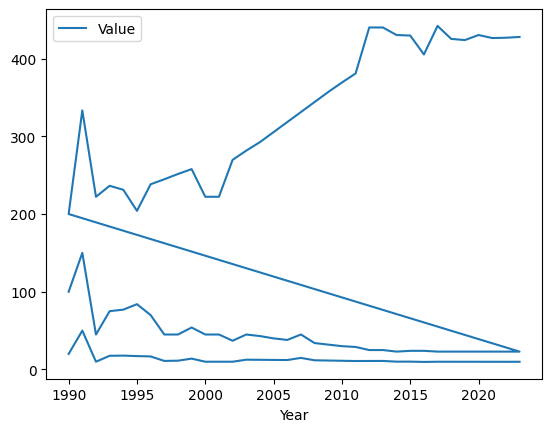

In [17]:
df_prod[(df_prod["Item Code"]==692) & (df_prod["Area"]=="Zimbabwe")][["Year","Value"]].plot(x="Year",y="Value")

In [56]:
df_prod.duplicated().sum()

0

### Intermediate synthesis

- Useful columns: ``Area``, ``Item``, ``Element``, ``Year``, ``Unit``, ``Value``
- Missing values: around 3% of NaN rows, corresponding to missing values. Those values might correspond to missing records from countries (eg. Vanilla production for Zimbabwe before 1990)
- No duplicated row

## Land Use 

In [18]:
land_path_file = Path(package_dir / "data/raw/Inputs_LandUse_E_All_Data_(Normalized)/Inputs_LandUse_E_All_Data_(Normalized).csv")

In [19]:
df_land = pd.read_csv(land_path_file)

In [20]:
df_land.head()

,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
0,2,'004,Afghanistan,6600,Country area,5110,Area,1961,1961,1000 ha,65286.0,A,NaN
1,2,'004,Afghanistan,6600,Country area,5110,Area,1962,1962,1000 ha,65286.0,A,NaN
2,2,'004,Afghanistan,6600,Country area,5110,Area,1963,1963,1000 ha,65286.0,A,NaN
3,2,'004,Afghanistan,6600,Country area,5110,Area,1964,1964,1000 ha,65286.0,A,NaN
4,2,'004,Afghanistan,6600,Country area,5110,Area,1965,1965,1000 ha,65286.0,A,NaN


In [21]:
df_land.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407812 entries, 0 to 407811
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Area Code        407812 non-null  int64  
 1   Area Code (M49)  407812 non-null  object 
 2   Area             407812 non-null  object 
 3   Item Code        407812 non-null  int64  
 4   Item             407812 non-null  object 
 5   Element Code     407812 non-null  int64  
 6   Element          407812 non-null  object 
 7   Year Code        407812 non-null  int64  
 8   Year             407812 non-null  int64  
 9   Unit             407812 non-null  object 
 10  Value            407812 non-null  float64
 11  Flag             407812 non-null  object 
 12  Note             0 non-null       float64
dtypes: float64(2), int64(5), object(6)
memory usage: 40.4+ MB


In [22]:
df_land.isna().sum()

Area Code               0
Area Code (M49)         0
Area                    0
Item Code               0
Item                    0
Element Code            0
Element                 0
Year Code               0
Year                    0
Unit                    0
Value                   0
Flag                    0
Note               407812
dtype: int64

In [23]:
df_land.describe()

,Area Code,Item Code,Element Code,Year Code,Year,Value,Note
count,407812.000000,407812.000000,407812.000000,407812.000000,407812.000000,4.078120e+05,0.0
mean,847.841456,6644.086361,7351.930990,1997.374825,1997.374825,3.780411e+04,NaN
std,1806.776628,35.867084,9253.305449,17.681801,17.681801,3.216609e+05,NaN
min,1.000000,6600.000000,5110.000000,1961.000000,1961.000000,0.000000e+00,NaN
25%,74.000000,6620.000000,5110.000000,1984.000000,1984.000000,9.670000e+00,NaN
50%,149.000000,6640.000000,5110.000000,2000.000000,2000.000000,6.247000e+01,NaN
75%,222.000000,6659.000000,7209.000000,2012.000000,2012.000000,1.733872e+03,NaN
max,5817.000000,6774.000000,72151.000000,2023.000000,2023.000000,1.409580e+07,NaN


In [24]:
df_land["Item"].value_counts()

Cropland                                                61609
Agricultural land                                       45121
Permanent meadows and pastures                          43491
Arable land                                             30458
Permanent crops                                         28736
Forest land                                             25983
Land area equipped for irrigation                       25244
Naturally regenerating forest                           16814
Planted Forest                                          16806
Country area                                            16039
Land area                                               16039
Agriculture                                             15615
Inland waters                                           11646
Other land                                               8967
Agriculture area under organic agric.                    7272
Primary Forest                                           7234
Temporar

In [25]:
df_land["Element"].value_counts()

Area                                                  222452
Share in Agricultural land                             64374
Share in Land area                                     54497
Share in Forest land                                   16572
Area per capita                                        15355
Value of agricultural production (Int. $) per Area     13891
Share in Cropland                                      12622
Carbon stock in living biomass                          8049
Name: Element, dtype: int64

In [57]:
df_land.duplicated().sum()

0

### Intermediate synthesis

- Useful columns: ``Area``, ``Item``, ``Element``, ``Year``, ``Unit``, ``Value``
- Missing values: none from columns of interest
- No duplicated row

## Emission totals

In [43]:
emission_path_file = Path(package_dir / "data/raw/Emissions_Totals_E_All_Data_(Normalized)/Emissions_Totals_E_All_Data_(Normalized).csv")

In [27]:
df_emission = pd.read_csv(emission_path_file)

In [28]:
df_emission.head()

,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Year Code,Year,Source Code,Source,Unit,Value,Flag,Note
0,2,'004,Afghanistan,5064,Crop Residues,7234,Direct emissions (N2O),1961,1961,3050,FAO TIER 1,kt,0.8762,E,NaN
1,2,'004,Afghanistan,5064,Crop Residues,7234,Direct emissions (N2O),1962,1962,3050,FAO TIER 1,kt,0.8829,E,NaN
2,2,'004,Afghanistan,5064,Crop Residues,7234,Direct emissions (N2O),1963,1963,3050,FAO TIER 1,kt,0.8236,E,NaN
3,2,'004,Afghanistan,5064,Crop Residues,7234,Direct emissions (N2O),1964,1964,3050,FAO TIER 1,kt,0.8882,E,NaN
4,2,'004,Afghanistan,5064,Crop Residues,7234,Direct emissions (N2O),1965,1965,3050,FAO TIER 1,kt,0.8978,E,NaN


In [31]:
df_emission.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2397460 entries, 0 to 2397459
Data columns (total 15 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Area Code        2397460 non-null  int64  
 1   Area Code (M49)  2397460 non-null  object 
 2   Area             2397460 non-null  object 
 3   Item Code        2397460 non-null  int64  
 4   Item             2397460 non-null  object 
 5   Element Code     2397460 non-null  int64  
 6   Element          2397460 non-null  object 
 7   Year Code        2397460 non-null  int64  
 8   Year             2397460 non-null  int64  
 9   Source Code      2397460 non-null  int64  
 10  Source           2397460 non-null  object 
 11  Unit             2397460 non-null  object 
 12  Value            2397460 non-null  float64
 13  Flag             2397460 non-null  object 
 14  Note             0 non-null        float64
dtypes: float64(2), int64(6), object(7)
memory usage: 274.4+ MB


In [32]:
df_emission["Item"].value_counts()

IPCC Agriculture                   117020
Manure Management                  114016
Agricultural Soils                  83324
Manure applied to Soils             79685
Agrifood systems                    77452
All sectors with LULUCF             76190
All sectors without LULUCF          75267
Manure left on Pasture              74709
Emissions from livestock            74285
Burning - Crop residues             73627
Crop Residues                       73412
Emissions from crops                70759
IPPU                                69839
AFOLU                               69677
Emissions on agricultural land      69677
Farm gate                           69644
Energy                              66039
Waste                               62580
Synthetic Fertilizers               61500
Pre- and Post- Production           60353
LULUCF                              60331
Food Retail                         53632
Food Transport                      53605
Food Household Consumption        

In [34]:
df_emission["Element"].value_counts()

Emissions (CO2eq) (AR5)                 445604
Emissions (N2O)                         392014
Emissions (CO2eq) from N2O (AR5)        363952
Emissions (CH4)                         321699
Emissions (CO2eq) from CH4 (AR5)        300272
Emissions (CO2)                         221226
Direct emissions (N2O)                  156965
Indirect emissions (N2O)                137704
Emissions (CO2eq) from F-gases (AR5)     58024
Name: Element, dtype: int64

In [35]:
df_emission["Source"].value_counts()

FAO TIER 1    2311303
UNFCCC          86157
Name: Source, dtype: int64

In [36]:
df_emission["Unit"].value_counts()

kt    2397460
Name: Unit, dtype: int64

In [37]:
df_emission["Flag"].value_counts()

E    2329596
A      45804
F      22060
Name: Flag, dtype: int64

In [38]:
df_emission[["Year"]].describe()

,Year
count,2.397460e+06
mean,2.000950e+03
std,1.546891e+01
min,1.961000e+03
25%,1.993000e+03
50%,2.003000e+03
75%,2.013000e+03
max,2.050000e+03


In [59]:
df_emission.duplicated().sum()

0

### Intermediate synthesis

- Useful columns: ``Area``, ``Item``, ``Element``, ``Year``, ``Unit``, ``Value``
- Missing data: None
- No duplicated row

## Food balances

In [41]:
balance_path_file = Path(package_dir / "data/raw/FoodBalanceSheets_E_All_Data_(Normalized)/FoodBalanceSheets_E_All_Data_(Normalized).csv")

In [42]:
df_balance = pd.read_csv(balance_path_file)

In [45]:
df_balance.head()

,Area Code,Area Code (M49),Area,Item Code,Item Code (FBS),Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
0,2,'004,Afghanistan,2501,'S2501,Population,511,Total Population - Both sexes,2010,2010,1000 No,28189.67,X,NaN
1,2,'004,Afghanistan,2501,'S2501,Population,511,Total Population - Both sexes,2011,2011,1000 No,29249.16,X,NaN
2,3,'008,Albania,2501,'S2501,Population,511,Total Population - Both sexes,2010,2010,1000 No,2913.40,X,NaN
3,3,'008,Albania,2501,'S2501,Population,511,Total Population - Both sexes,2011,2011,1000 No,2900.65,X,NaN
4,2,'004,Afghanistan,2501,'S2501,Population,511,Total Population - Both sexes,2012,2012,1000 No,30466.48,X,NaN


In [47]:
df_balance.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4660700 entries, 0 to 4660699
Data columns (total 14 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Area Code        4660700 non-null  int64  
 1   Area Code (M49)  4660700 non-null  object 
 2   Area             4660700 non-null  object 
 3   Item Code        4660700 non-null  int64  
 4   Item Code (FBS)  4660700 non-null  object 
 5   Item             4660700 non-null  object 
 6   Element Code     4660700 non-null  int64  
 7   Element          4660700 non-null  object 
 8   Year Code        4660700 non-null  int64  
 9   Year             4660700 non-null  int64  
 10  Unit             4660700 non-null  object 
 11  Value            4660700 non-null  float64
 12  Flag             4660700 non-null  object 
 13  Note             0 non-null        float64
dtypes: float64(2), int64(5), object(7)
memory usage: 497.8+ MB


In [48]:
df_balance["Item"].value_counts()

Milk - Excluding Butter     98394
Eggs                        92496
Miscellaneous               73068
Cereals - Excluding Beer    53751
Oilcrops                    53172
                            ...  
Sugar non-centrifugal        9756
Palm kernels                 8620
Ricebran Oil                 7864
Population                   2825
Meat, Aquatic Mammals          56
Name: Item, Length: 120, dtype: int64

In [50]:
df_balance[df_balance["Item"]=="Eggs"]

,Area Code,Area Code (M49),Area,Item Code,Item Code (FBS),Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
849729,145,'583,Micronesia (Federated States of),2949,'S2949,Eggs,5511,Production,2019,2019,1000 t,0.00,E,NaN
849927,145,'583,Micronesia (Federated States of),2949,'S2949,Eggs,5511,Production,2020,2020,1000 t,0.00,E,NaN
850177,145,'583,Micronesia (Federated States of),2949,'S2949,Eggs,5511,Production,2021,2021,1000 t,0.00,E,NaN
850375,145,'583,Micronesia (Federated States of),2949,'S2949,Eggs,5511,Production,2022,2022,1000 t,0.00,E,NaN
850625,145,'583,Micronesia (Federated States of),2949,'S2949,Eggs,5611,Import quantity,2019,2019,1000 t,1.00,E,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4628858,5000,'001,World,2744,'S2744,Eggs,681,Fat supply quantity (t),2018,2018,t,6824445.98,E,NaN
4628877,5000,'001,World,2744,'S2744,Eggs,681,Fat supply quantity (t),2019,2019,t,7158234.12,E,NaN
4628906,5000,'001,World,2744,'S2744,Eggs,681,Fat supply quantity (t),2020,2020,t,7437591.40,E,NaN
4628925,5000,'001,World,2744,'S2744,Eggs,681,Fat supply quantity (t),2021,2021,t,7427520.63,E,NaN


In [51]:
df_balance["Element"].value_counts()

Domestic supply quantity                  320109
Import quantity                           308094
Residuals                                 300425
Food supply (kcal)                        298779
Protein supply quantity (t)               298779
Fat supply quantity (t)                   298779
Protein supply quantity (g/capita/day)    298768
Fat supply quantity (g/capita/day)        298768
Food supply (kcal/capita/day)             298768
Food                                      288896
Food supply quantity (kg/capita/yr)       288887
Stock Variation                           265040
Export quantity                           258461
Production                                220798
Losses                                    142255
Feed                                      114534
Other uses (non-food)                     110513
Processing                                 90908
Tourist consumption                        88854
Seed                                       67460
Total Population - B

In [52]:
df_balance[df_balance["Value"] < 0]

,Area Code,Area Code (M49),Area,Item Code,Item Code (FBS),Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
4590,13,'048,Bahrain,2905,'S2905,Cereals - Excluding Beer,5072,Stock Variation,2021,2021,1000 t,-49.0,E,NaN
5530,18,'064,Bhutan,2905,'S2905,Cereals - Excluding Beer,5072,Stock Variation,2021,2021,1000 t,-9.0,E,NaN
7171,13,'048,Bahrain,2905,'S2905,Cereals - Excluding Beer,5170,Residuals,2021,2021,1000 t,-2.0,E,NaN
13073,13,'048,Bahrain,2511,'S2511,Wheat and products,5072,Stock Variation,2021,2021,1000 t,-39.0,I,NaN
16358,18,'064,Bhutan,2511,'S2511,Wheat and products,5072,Stock Variation,2021,2021,1000 t,-2.0,I,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4660591,5000,'001,World,2899,'S2899,Miscellaneous,5170,Residuals,2018,2018,1000 t,-5784.0,E,NaN
4660592,5000,'001,World,2899,'S2899,Miscellaneous,5170,Residuals,2019,2019,1000 t,-6107.0,E,NaN
4660593,5000,'001,World,2899,'S2899,Miscellaneous,5170,Residuals,2020,2020,1000 t,-6987.0,E,NaN
4660594,5000,'001,World,2899,'S2899,Miscellaneous,5170,Residuals,2021,2021,1000 t,-7798.0,E,NaN


In [60]:
df_balance[["Year"]].describe()

,Year
count,4.660700e+06
mean,2.016055e+03
std,3.749081e+00
min,2.010000e+03
25%,2.013000e+03
50%,2.016000e+03
75%,2.019000e+03
max,2.022000e+03


In [61]:
df_balance["Unit"].value_counts()

1000 t          2576347
t                597558
g/cap/d          597536
million Kcal     298779
kcal/cap/d       298768
kg/cap           288887
1000 No            2825
Name: Unit, dtype: int64

In [63]:
df_balance[df_balance["Unit"]=="g/cap/d"]["Element"].value_counts()

Protein supply quantity (g/capita/day)    298768
Fat supply quantity (g/capita/day)        298768
Name: Element, dtype: int64

In [64]:
df_balance.isna().sum()

Area Code                0
Area Code (M49)          0
Area                     0
Item Code                0
Item Code (FBS)          0
Item                     0
Element Code             0
Element                  0
Year Code                0
Year                     0
Unit                     0
Value                    0
Flag                     0
Note               4660700
dtype: int64

In [65]:
df_balance.duplicated().sum()

0

### Intermediate analysis

- Useful columns: ``Area``, ``Item``, ``Element``, ``Year``, ``Unit``, ``Value``
- No missing row 
- No duplicated row